# Multilayer Perceptron Regression

## Objectives

* **Understand** the concept of Regression,
* **Learn and Explore** about the mathematical principles behind Regression Problems,
* **Create** a algorithm to for Regression Problems,
* **Observe** the performance of the algorithm trained.

## The Problem: Predict Values

<p style='text-align: justify;'> 
So far, we have used all the knowledge of artificial intelligence solely for classification problems. Based on one or more variables, it is possible to classify an item into class $X$, $Y$, or $Z$.

However, there are other types of problems that can be solved with the knowledge that artificial intelligence provides, such as regression problems. These are prediction problems characterized by situations where we need to forecast a value based on predefined variables, such as predicting wind speed based on air humidity or the value of a health insurance plan based on the age of beneficiary.
</p>  

## The Solution: Regression

<p style='text-align: justify;'> 
Regression is a powerful statistical technique portraying the interconnectedness between a dependent variable ($Y$) and one or more independent variables ($X$). The cardinal objective is to discern the optimal line that concisely encapsulates this correlation, thus laying the groundwork for dependable prognostications or inferences.
    
Linear regression is primarily categorized into simple and multiple linear regression. Simple linear regression concerns itself with a solitary autonomous variable, while multiple linear regression accommodates two or more independent variables.

The crux of the linear regression function resides in the Mean Squared Error (MSE), which gauges the disparity between the data points and the line forged by the model. MSE calculation entails extracting the predicted values from the regression model, deducting the corresponding actual values, squaring these discrepancies, summing them, and ultimately dividing by the total number of data points. The resultant value, the average squared discrepancy, indicates the model's adeptness in fitting the data. Once an acceptable fit is achieved, the linear regression model can predict Y values for novel $X$ values that were not part of the initial dataset.

While formidable, the efficacy of the regression model may wane if the relationship between the variables deviates from a strict proportionality, as is the case in a linear function. This constraint arises from the method's simplistic nature and reliance on a strictly linear correlation between the variables. But what if the relationship between our variables is not linear? And what if we are contending with multiple variables? Enter the MLP. It ushers in the capability to predict values in more intricate scenarios that are not necessarily linear, thus expanding the domain of predictive modeling.
    
</p>  

## ☆ Challenger #1 (Linear): Orange Weight Prediction ☆

<p style='text-align: justify;'> 
Suppose you are studying the relationship between the weight of oranges and their diameter. You collected data from different oranges, measuring their weight in grams and diameter in centimeters. Now, you want to use linear regression to predict the weight of an orange based on its diameter.
</p>  

| Diameter (cm) | Weight (g) |
| :-:          | :-:      |
|     6        |    120   |
|     7        |    160   |
|     8        |    170   |
|     9        |    200   |
|    10        |    230   |
|    11        |    270   |
|    12        |    270   |
|    13        |    320   |
|    14        |    360   |


### ☆ Solution ☆ 

<p style='text-align: justify;'> 
First, given two arrays that describe the behavior of the variables, let is first plot the graph to better visualize the data.
</p>

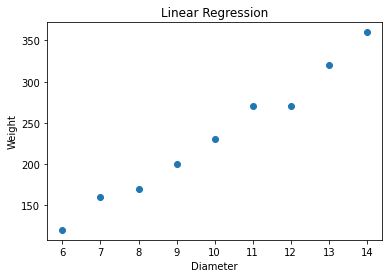

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Training data
x_train = np.array([6, 7, 8, 9, 10, 11, 12, 13, 14])              # Diameter
y_train = np.array([120, 160, 170, 200, 230, 270, 270, 320, 360]) # Weight

# Scatter plot
plt.scatter(x_train, y_train)
plt.xlabel('Diameter')
plt.ylabel('Weight')
plt.title('Linear Regression')
plt.show()

<p style='text-align: justify;'> 
Observing the generated graph, it is noticeable that there is a linear behavior as the variables vary. To estimate the line that describes its behavior and predict the values of $X$, it is necessary to perform a linear regression.
</p>

In [2]:
# Function to calculate the regression line
def linear_regression(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    # Regression Coeficients
    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    intercept = (sum_y - slope * sum_x) / n

    return slope, intercept 

def predict(x, slope, intercept):
    return slope * x + intercept

# Performs linear regression
slope, intercept = linear_regression(x_train, y_train)

# Makes a prediction for a new value

x_new = 5
y_new = predict(x_new, slope, intercept)

print(f"The prediction for x={x_new} is y={y_new}")

The prediction for x=5 is y=90.83333333333334


<p style='text-align: justify;'> 

Next, we can use the slope  and the intercept value of the linear function to plot the graph of the samples again, this time with the line that best describes their behavior.

</p>

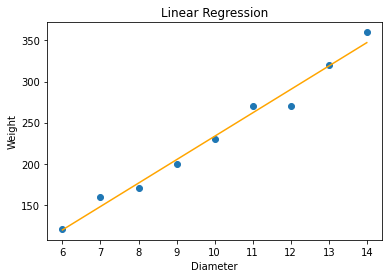

In [3]:
# Calculate linear regression line
regression_line = slope * x_train + intercept

# Scatter plot
plt.scatter(x_train, y_train)
plt.plot(x_train, regression_line, color='orange')
plt.xlabel('Diameter')
plt.ylabel('Weight')
plt.title('Linear Regression')
plt.show()

##### Discussion: What happened?

- ``How did the algorithm predicted the X value?``
     
- ``Did the plotted line on the graph match the behavior of the points?``

- `` Would this solution be the same, if tha data does not have a linear pattern?``

## ☆ Challenger #2(Non Linear): Orange Weight Prediction ☆

<p style='text-align: justify;'> 
A farmer is interested in predicting the weight of oranges based on their characteristics. He has collected a dataset that includes the diameter, color, and texture of the peel of each orange, along with the corresponding weight. The goal is to develop a regression model using a perceptron to predict the weight of oranges based on these characteristics. The collected features are as follows:

- **Diameter**: the diameter of the orange in centimeters. </br>

- **Color**: a measure of the color of the orange on a scale from $0$ to $1$, where $0$ represents green oranges and $1$ represents ripe oranges.</br>

- **Texture**: a measure of the texture of the orange peel on a scale from $0$ to $1$, where $0$ represents smooth peel and $1$ represents rough peel.</br>

The weight of the oranges has been measured in grams and is the output variable that we want to predict. Your goal as a data scientist is to train a regression perceptron using the collected data to make accurate predictions of the weight of oranges based on the features of diameter, color, and texture. Here is the data colected:
</p>

| Diameter (cm) | Color | Texture | Weight (g) |
| :-:           | :-:   | :-:     | :-:      |
| 7.6           | 0.4   | 0.3     | 130      |
| 7.9           | 0.2   | 0.1     | 145      |
| 6.8           | 0.6   | 0.4     | 110      |
| 6.4           | 0.5   | 0.2     | 95       |
| 8.2           | 0.3   | 0.5     | 160      |
| 7.2           | 0.4   | 0.3     | 120      |
| 6.6           | 0.2   | 0.2     | 100      |
| 7.1           | 0.3   | 0.4     | 135      |
| 6.9           | 0.5   | 0.1     | 115      |
| 8.0           | 0.6   | 0.3     | 150      |


### ☆ Solution ☆ 

Plotting the graphs of the relationship between weight and each dependent variable, we can see that they do not necessarily have a linear relationship:

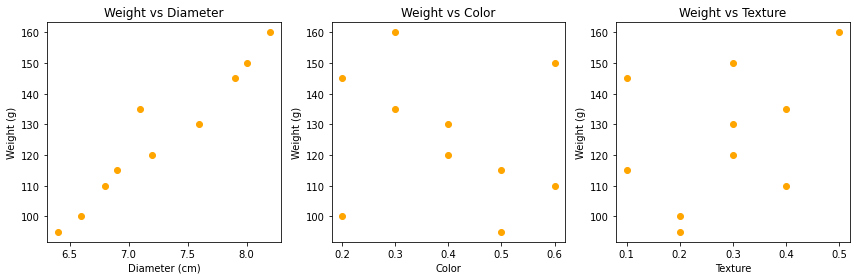

In [4]:
import matplotlib.pyplot as plt

# Data from the table
diameter = [7.6, 7.9, 6.8, 6.4, 8.2, 7.2, 6.6, 7.1, 6.9, 8.0]
color = [0.4, 0.2, 0.6, 0.5, 0.3, 0.4, 0.2, 0.3, 0.5, 0.6]
texture = [0.3, 0.1, 0.4, 0.2, 0.5, 0.3, 0.2, 0.4, 0.1, 0.3]
weight = [130, 145, 110, 95, 160, 120, 100, 135, 115, 150]

# Plotting the graphs
plt.figure(figsize=(12, 4))

# Graph of weight against diameter
plt.subplot(1, 3, 1)
plt.scatter(diameter, weight, color='orange')
plt.xlabel('Diameter (cm)')
plt.ylabel('Weight (g)')
plt.title('Weight vs Diameter')

# Graph of weight against color
plt.subplot(1, 3, 2)
plt.scatter(color, weight, color='orange')
plt.xlabel('Color')
plt.ylabel('Weight (g)')
plt.title('Weight vs Color')

# Graph of weight against texture
plt.subplot(1, 3, 3)
plt.scatter(texture, weight,  color='orange')
plt.xlabel('Texture')
plt.ylabel('Weight (g)')
plt.title('Weight vs Texture')

# Displaying the graphs
plt.tight_layout()
plt.show()


Therefore, in this case, a linear regression model will not solve the problem efficiently. Instead, we built a neural network to predict the values:

In [5]:
import numpy as np

class MultilayerPerceptron:
    def __init__(self, num_inputs, hidden_layers, num_outputs):
        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs
        self.weights = self._initialize_weights()

    def _initialize_weights(self):
        weights = []
        layer_sizes = [self.num_inputs] + self.hidden_layers + [self.num_outputs]

        for i in range(1, len(layer_sizes)):
            layer_weights = np.random.randn(layer_sizes[i], layer_sizes[i-1])
            weights.append(layer_weights)

        return weights

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _forward_pass(self, X):
        activations = [X]

        for i in range(len(self.weights)):
            current_activation = self._sigmoid(np.dot(activations[i], self.weights[i].T))
            activations.append(current_activation)

        return activations

    def _backward_pass(self, X, y, activations, learning_rate):
        num_examples = X.shape[0]
        delta = activations[-1] - y.reshape(-1, self.num_outputs)

        for i in range(len(self.weights)-1, -1, -1):
            weight_gradients = np.dot(delta.T, activations[i])
            self.weights[i] -= (learning_rate / num_examples) * weight_gradients

            delta = np.dot(delta, self.weights[i]) * (activations[i] * (1 - activations[i]))

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            activations = self._forward_pass(X)
            self._backward_pass(X, y, activations, learning_rate)

    def predict(self, X):
        activations = self._forward_pass(X)
        return activations[-1].flatten()

<p style='text-align: justify;'>
After build the Multilayer Perceptron, its time to input the data, and train the model, so we can aply in other cases:

</p>

In [6]:
# Training data
X = np.array([[7.6, 0.4, 0.3],
              [7.9, 0.2, 0.1],
              [6.8, 0.6, 0.4],
              [6.4, 0.5, 0.2],
              [8.2, 0.3, 0.5],
              [7.2, 0.4, 0.3],
              [6.6, 0.2, 0.2],
              [7.1, 0.3, 0.4],
              [6.9, 0.5, 0.1],
              [8.0, 0.6, 0.3]])

y = np.array([130, 145, 110, 95, 160, 120, 100, 135, 115, 150])

# Data normalization
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y_normalized = (y - np.mean(y)) / np.std(y)

# Create an instance of Multilayer Perceptron
mlp = MultilayerPerceptron(num_inputs=3, hidden_layers=[4, 4], num_outputs=1)

# Train the model
mlp.train(X_normalized, y_normalized, epochs=100, learning_rate=0.1)

# Test data
X_test = np.array([[7.8, 0.4, 0.2],
                   [6.7, 0.3, 0.3],
                   [7.0, 0.6, 0.5]])

# Normalize the test data
X_test_normalized = (X_test - np.mean(X, axis=0)) / np.std(X, axis=0)

# Make predictions for the test data
predictions_normalized = mlp.predict(X_test_normalized)

# Denormalize the output predictions
predictions = (predictions_normalized * np.std(y)) + np.mean(y)

print("Predictions:")
for i in range(len(X_test)):
    print("Orange {}: Predicted Weight: {:.2f}g".format(i+1, predictions[i]))

Predictions:
Orange 1: Predicted Weight: 127.70g
Orange 2: Predicted Weight: 126.61g
Orange 3: Predicted Weight: 127.07g


##### Discussion: What happened?

- ``How did the algorithm predicted the orange weights?``
     
- ``Would the last model we would be able to predict the values? Why?``

## ☆ Challenger #3: Wind Speed Prediction ☆

Wind speed is an important factor that can affect the growth and yield of oranges. The farmer has collected historical data on wind speed and its corresponding suitability for orange cultivation. Each sample consists of a measurement of wind speed (in meters per second), which is available in _datasets_ folder, named as `wind_data_train.csv`.

In order to ensure ideal growth conditions, the same farmer wishes to develop a prediction system that determines the wind speed based on the historical data.

You are tasked with training the model using the provided data and then testing it using a separate test dataset, named `wind_data_test.cs` and located at _datasets_ directory.

### ☆ Solution ☆ 

First, we need to read and process the input files. Remember that what will be predicted is the wind speed at $10$ meters ($ws\_10$), so $y$ should have the last row, and $x$ should not have the last row.

In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

2023-06-09 10:04:40.136773: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# Read the input file:
x_train = pd.read_csv("./datasets/wind_data_train.csv", sep=",", header=0)

values_title = list(x_train.columns.values)

y_train = x_train.iloc[:, [-1]]
x_train = x_train.iloc[:, [*range(len(values_title)-1)]]

x_test = pd.read_csv("./datasets/wind_data_test.csv", sep=",", header=0)

y_test = x_test.iloc[:, [-1]]
x_test = x_test.iloc[:, [*range(len(values_title)-1)]]


# Show data:
print("----------train data info------------")
print(x_train.info())
print(x_train.head())
print(y_train.head())

print("----------test  data info------------")
print(x_test.info())
print(x_test.head())
print(y_test.head())

----------train data info------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   day       44640 non-null  int64  
 1   Min       44640 non-null  int64  
 2   glo_avg   44640 non-null  float64
 3   diff_avg  44640 non-null  float64
 4   lw_avg    44640 non-null  float64
 5   tp_sfc    44640 non-null  float64
 6   humid     44640 non-null  float64
 7   press     44640 non-null  float64
 8   wd_10m    44640 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.1 MB
None
   day  Min  glo_avg  diff_avg  lw_avg  tp_sfc  humid   press  wd_10m
0    1    0   -4.276    -1.804   347.4   20.53   79.9  904.91   196.8
1    1    1   -4.356    -1.801   347.3   20.47   80.1  904.97   197.6
2    1    2   -4.359    -1.780   348.0   20.40   80.2  904.97   209.5
3    1    3   -4.239    -1.711   348.8   20.37   80.2  905.03   212.9
4    1    4   -4.206

<p style='text-align: justify;'>
Plot data:
</p>

<AxesSubplot: >

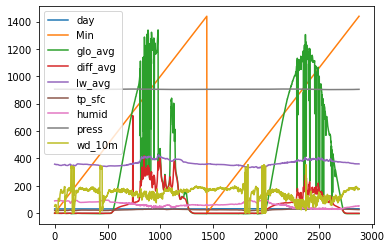

In [9]:
x_test.plot()

Process data:

In [10]:
#Convert the commented code to np, it automatically normalizes between 0 and 1:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

# Check normalization:
x_train = x_train/2015
x_test = x_test/2015

print("----------NAN in xtrain------------")
print(np.argwhere(np.isnan(x_train)))
print("----------NAN in ytrain------------")
print(np.argwhere(np.isnan(y_train)))

----------NAN in xtrain------------
[]
----------NAN in ytrain------------
[]


Creating a function to plot graphs:

In [11]:
def plot_data_comp(title,data_plot1,data_plot2):
    plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

    # plt.subplot(2, 1, 0)
    plt.plot(data_plot1,label="Original")
    plt.plot(data_plot2,label="Predicted")

    plt.xlabel("Minutes")
    plt.ylabel("Wind Speed")
    plt.title(title)
    plt.legend(loc=0)

<p style='text-align: justify;'>

Afterward, we create functions for building and reading the network based on TensorFlow.

</p>

In [12]:
def create_model(x_train, y_train, x_test, y_test, listall, name): 
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(len(x_train[0]), input_shape=(len(x_train[0]),), activation=tf.nn.tanh))
    model.add(tf.keras.layers.Dense(90, activation=tf.nn.tanh))
    model.add(tf.keras.layers.Dense(90, activation=tf.nn.tanh))
    model.add(tf.keras.layers.Dense(90, activation=tf.nn.tanh))
    model.add(tf.keras.layers.Dense(1, activation="linear"))

    tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    
    learning_rate = 0.01
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
                    loss=['mse'],
                    metrics=['mae'])

    print("training learning_rate=%f" % learning_rate)
    history = model.fit(x_train, y_train, batch_size=50, epochs=30)

    val_loss, val_acc = model.evaluate(x_test, y_test)
    print("MSE:", val_loss, "|MAE:", val_acc)

    # Plot training & validation loss values
    plt.figure(figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(history.history['loss'])
    plt.title('Model loss Final Loss %f (MSE):%.2f MAE:%.2f' % (learning_rate, val_loss, val_acc))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    if name != False:
        model_json = model.to_json()
        with open("%s.json" % (name), "w") as json_file:
            json_file.write(model_json)
        # Serialize weights to HDF5
        model.save_weights("%s.h5" % (name))
        print("Saved model to disk")

    return model

In [13]:
def load_model(name):
    # Load JSON and create model
    json_file = open("%s.json" % name, "r")
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)

    # Load weights into the new model
    loaded_model.load_weights("%s.h5" % name)
    print("Loaded model from disk")
    return loaded_model

In [14]:
def get_model(x_train, y_train, x_test, y_test, listall, name):
    my_file = Path("%s.json" % (name))
    if my_file.is_file():
        return load_model(name)
    return create_model(x_train, y_train, x_test, y_test, listall, name);

<p style='text-align: justify;'>

Training the network (or loading if one exists with the name specified within "quotation marks").

</p>

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
training learning_rate=0.010000
Epoch 1/30
893/893 [==============================] - 1s 699us/step - loss: 0.4612 - mae: 0.5041
Epoch 2/30
893/893 [==============================] - 1s 708us/step - loss: 0.3434 - mae: 0.4563
Epoch 3/30
893/893 [==============================] - 1s 746us/step - loss: 0.3213 - mae: 0.4360
Epoch 4/30
893/893 [==============================] - 1s 744us/step - loss: 0.3133 - mae: 0.4287
Epoch 5/30
893/893 [==============================] - 1s 732us/step - loss: 0.3075 - mae: 0.4238
Epoch 6/30
893/893 [==============================] - 1s 741us/step - loss: 0.3006 - mae: 0.4178
Epoch 7/30
893/893 [==============================] - 1s 724us/step - loss: 0.2975 - mae: 0.4152
Epoch 8/30
893/893 [==============================] - 1s 725us/step - loss: 0.2946 - mae: 0.4134
Epoch 9/30
893/893 [=======================

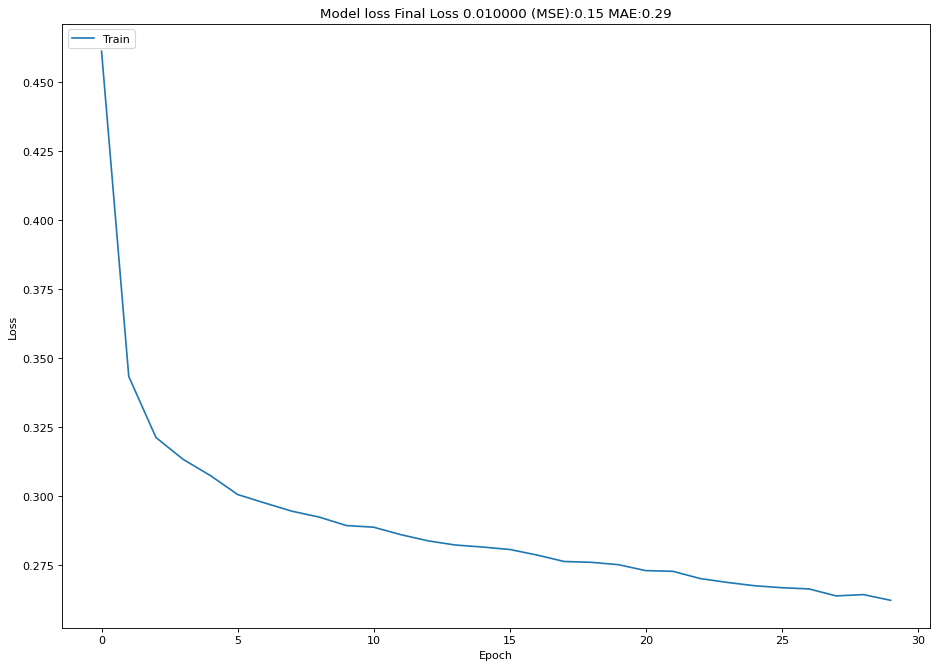

In [15]:
#Input and Outpus number
listsee = [0]
listall = [9]

model = get_model(x_train, y_train, x_test, y_test, listall, "temp2015_2")

<p style='text-align: justify;'>

Using the network to predict the data using the training dataset.

</p>

90/90 [==============================] - 0s 474us/step


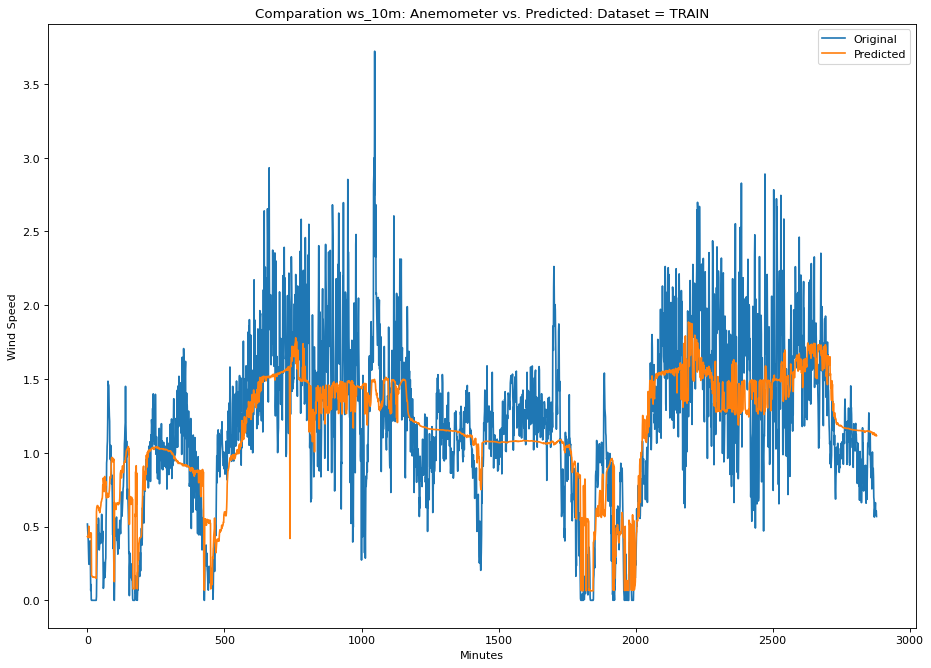

In [16]:
predictions = model.predict(x_test)

for i in listsee:
    plot_data_comp("Comparation %s: Anemometer vs. Predicted: Dataset = TRAIN" % (values_title[9]),y_test[:,i],
                   predictions[:,i])

## Summary

<p style='text-align: justify;'>
In this notebook, we learned the concept of regression in an approach to a new problem: predicting values based on a pattern. We also applied all the concepts in practice, in two simple data analysis problem.  Despite its limitations, the linear regression model is highly effective in predicting values for proportional systems. To surpass linear regression model, we can use MultiLayer Perceptron to predict values in non linear models with a large number of variables precisely.</br>
</p>

## Clear the Memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [17]:
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True)

## Next

Congratulations, you have completed second part the learning objectives of the course! As a final exercise, successfully complete an applied problem in the assessment in [_04-multilayer-perceptron-assessment.ipynb_](04-multilayer-perceptron-assessment.ipynb)